# Simple Linear Regression on Housing Price Dataset

In this notebook, we will:

- Load the **housing_price_dataset.csv**
- Explore the dataset  
- Train a Simple Linear Regression model  
- Evaluate the model using MSE & R²  
- Visualize the regression line  

 **Importing Required Libraries**
- pandas → for handling CSV data
- numpy → numerical arrays
- matplotlib → plotting graphs
- sklearn → ML model + evaluation metrics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We load the CSV file:

``housing_price_dataset.csv``

Then we display the first few rows to understand the structure.


In [5]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


**Inspecting the Dataset**
- Check column names  
- Look for missing values  
- Inspect data types  

In [26]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [8]:
print("Dataset Columns:", df.columns.tolist())
print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
df.isnull().sum()

Dataset Columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB

Missing values per column:


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

**Selecting the Feature (X) and Target (y)**

You must choose **one independent variable** for Simple Linear Regression.

Example (you can change this based on dataset):
- X = "Avg. Area Income"
- y = "price"

Modify the column names as needed.

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [12]:
X = df[["Avg. Area Income"]]
y = df["Price"]
print(X.head())
print(y.head())

   Avg. Area Income
0       79545.45857
1       79248.64245
2       61287.06718
3       63345.24005
4       59982.19723
0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


- **Feature (X):** `Avg. Area Income`
- **Target (y):** `Price`
- \(b\) = slope (coefficient)
- \(a\) = intercept

In [15]:
model = LinearRegression()

model.fit(X, y)
print("Slope (Coefficient) for Avg. Area Income:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient) for Avg. Area Income: 21.19548317221354
Intercept: -221579.47822252335


**Making Predictions on the Training Data**
- Use the trained model to predict `Price` for the given `Avg. Area Income` values.
- Compare **Actual vs Predicted** values to see how well the model fits.

In [18]:
y_pred = model.predict(X)

comparison_df = pd.DataFrame({
    "Avg. Area Income": X["Avg. Area Income"].head(10),
    "Actual Price": y.head(10),
    "Predicted Price": y_pred[:10]
})

comparison_df

,Avg. Area Income,Actual Price,Predicted Price
0,79545.45857,1.059034e+06,1.464425e+06
1,79248.64245,1.505891e+06,1.458134e+06
2,61287.06718,1.058988e+06,1.077430e+06
3,63345.24005,1.260617e+06,1.121053e+06
4,59982.19723,6.309435e+05,1.049772e+06
5,80175.75416,1.068138e+06,1.477784e+06
6,64698.46343,1.502056e+06,1.149736e+06
7,78394.33928,1.573937e+06,1.440026e+06
8,59927.66081,7.988695e+05,1.048616e+06
9,81885.92718,1.545155e+06,1.514032e+06


**Evaluating the Model**
1. **Mean Squared Error (MSE)**  
   - The average of the squared differences between actual and predicted prices.  
   - Lower MSE = better model.

2. **R² Score (Coefficient of Determination)**  
   - Shows how much of the variation in `Price` is explained by `Avg. Area Income`.  
   - Closer to 1 → better fit.

In [20]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 73645940735.13448
R² Score: 0.40925930704314073


**Visualizing the Regression Line(`Avg. Area Income` vs `Price`)**

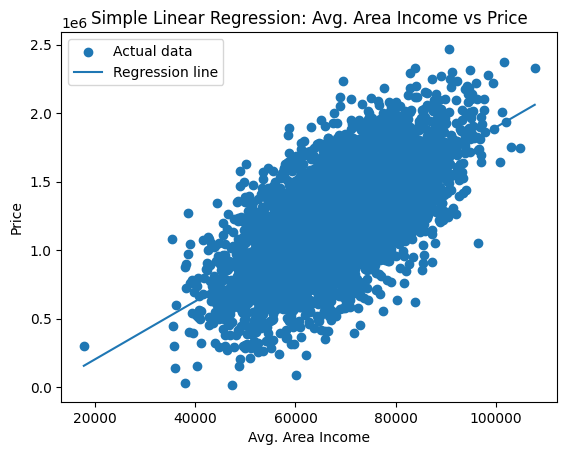

In [27]:
plt.scatter(X["Avg. Area Income"], y, label="Actual data")

sorted_idx = np.argsort(X["Avg. Area Income"].values)
X_sorted = X["Avg. Area Income"].values[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.plot(X_sorted, y_pred_sorted, label="Regression line")

plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Avg. Area Income vs Price")
plt.legend()
plt.show()

**Predicting Price for New Avg. Area Income Values**


In [38]:
X_new = df[["Avg. Area Income"]]
X_new = np.array([[20000],
                  [50000],
                  [90000]])

y_new_pred = model.predict(X_new)

new_pred_df = pd.DataFrame({
    "Avg. Area Income": X_new.ravel(),
    "Predicted Price": y_new_pred
})

new_pred_df


C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Avg. Area Income,Predicted Price
0,20000,2.023302e+05
1,50000,8.381947e+05
2,90000,1.686014e+06


**for avoiding warning**

In [36]:
X_new = pd.DataFrame({
    "Avg. Area Income": [20000, 50000, 90000]
})

y_new_pred = model.predict(X_new)
pd.DataFrame({
    "Avg. Area Income": X_new["Avg. Area Income"],
    "Predicted Price": y_new_pred
})

,Avg. Area Income,Predicted Price
0,20000,2.023302e+05
1,50000,8.381947e+05
2,90000,1.686014e+06
